1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step
0.jpg --> Predicted Digit: 0


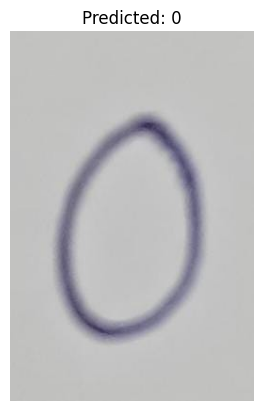

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1.jpg --> Predicted Digit: 1


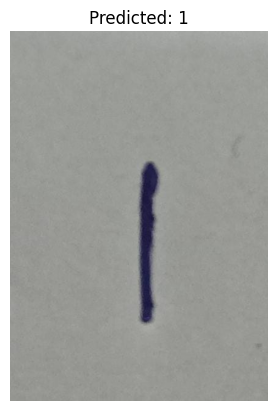

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
2.jpg --> Predicted Digit: 2


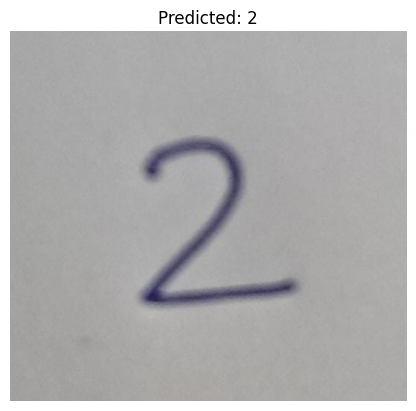

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
3.jpg --> Predicted Digit: 3


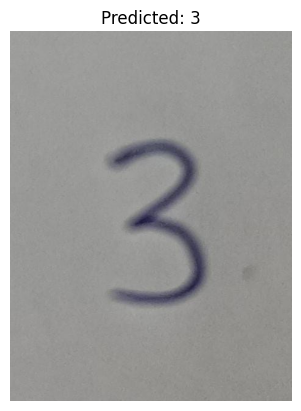

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
4.jpg --> Predicted Digit: 4


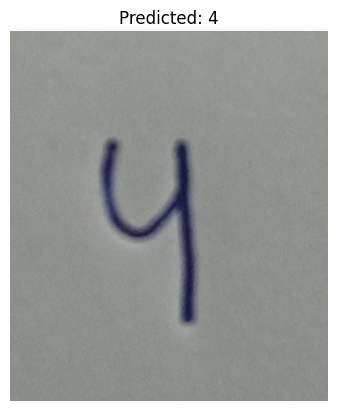

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
5.jpg --> Predicted Digit: 9


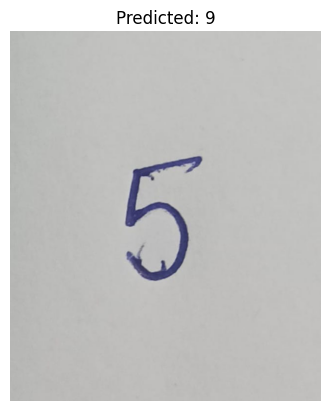

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
6.jpg --> Predicted Digit: 6


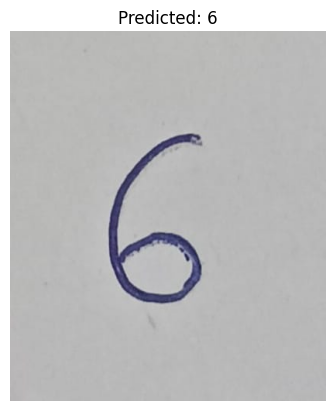

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
7.jpg --> Predicted Digit: 7


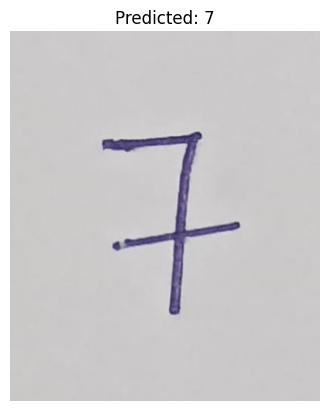

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
8.jpg --> Predicted Digit: 8


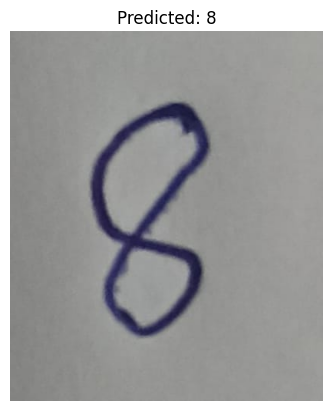

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
9.jpg --> Predicted Digit: 9


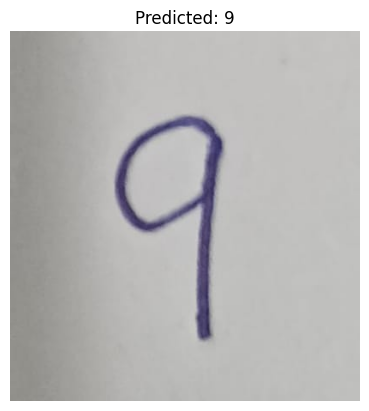

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

# ------------------------------
# 1️⃣ Load your saved model
# ------------------------------
model = tf.keras.models.load_model('digits_recognition_cnn.h5')

# ------------------------------
# 2️⃣ Define helper: load & preprocess
# ------------------------------
def load_and_prepare_image(image_path):
    # Load image in grayscale
    img = Image.open(image_path).convert('L')  # 'L' mode for grayscale
    # Resize to 28x28
    img = img.resize((28, 28))
    # Convert to numpy
    img_array = np.array(img)
    # Invert colors if background is black and digits are white (optional)
    img_array = 255 - img_array
    # Normalize
    img_array = img_array / 255.0
    # Add channel dimension
    img_array = img_array.reshape(1, 28, 28, 1)
    return img_array

# ------------------------------
# 3️⃣ Load multiple images
# ------------------------------
# 👇 Put your images in a folder, e.g. 'custom_digits/'
custom_images_folder = 'C:/Project/HandWritten_Recognition_Digits/Digits'

# Store predictions
for filename in os.listdir(custom_images_folder):
    if filename.endswith('.png') or filename.endswith('.jpg'):
        img_path = os.path.join(custom_images_folder, filename)
        img_prepared = load_and_prepare_image(img_path)
        
        # Predict
        prediction = model.predict(img_prepared)
        predicted_label = np.argmax(prediction)
        
        print(f"{filename} --> Predicted Digit: {predicted_label}")
        
        # Show the image
        img = Image.open(img_path)
        plt.imshow(img, cmap='gray')
        plt.title(f'Predicted: {predicted_label}')
        plt.axis('off')
        plt.show()
